# Introduction
The purpose of this notebook is to demonstrate a potential use case for the Lana Del Rey - Released Song Discography (Genius) dataset.
Let's assume I want to know which albums or song categories have the most page views, to get a better sense of which albums are overall more popular on Genius based on the attention indivudal songs receive. In order to find the answer, I'll be looking at the page views for song pages on Genius, grouped by song categories, transforming the dataset using pandas and visualizing using a combination of matplotlib and seaborn.

# Initial Setup
I first change the DPI of my matplotlib figure displays to 150 DPI to make them easier to see and read. I also list the categories in chronological, from Lana Del Rey's ealiest album to her newest album with the two umbrella categories at the end, sorting the category column in this order. Once that's complete, I'll separate out the columns I need for my visualizations from the lana dataframe into df_v.

# Configuring matplotlib figure to be higher resolution
# Ordering category values in chronological order and then sorting 'category' column
Highest Total Page Views Per Category
The easiest way to see which categories are the most popular on Genius is to total up each individual song's page views and compare them to one another. I group the dataframe by category and sum up the song_page_views before plotting them on a horizontal barplot.

# Grouping by category, summing song_page_views, and dropping the 'song_title' column
# Horizontal barplot
From the barplot, we can see that "Born to Die" has the most page views overall, with "Norman Fucking Rockwell!" falling in second place. The albums with the least page views overall are Lana's first album, "Lana Del Ray a.k.a. Lizzy Grant," followed by the spoken-word album "Violet Bent Backwards Over the Grass." This method does provide us with an answer to our question of what categories are the most and least popular overall.
Despite this, I'm not completely satisfied: there are a few problems with this approach. To demonstrate one, let's look at the top ten Lana Del Rey songs on Genius in terms of page views.

# Top ten songs (highest page views)
The number one song is "Young and Beautiful," a non-album song by Lana Del Rey with 2 million views. Despite this, the "Non-Album Songs" category isn't even in the top five categories with the overall highest page view totals according to the barplot. Also, "Norman Fucking Rockwell!" does not have a song within the top ten, despite having the second highest overall page view total on the plot. This suggests that there are distribution issues with the page views per song, something we can confirm by looking at a histogram of the page views.

# Histogram
The histogram shows that the data is indeed skewed to the right, with most songs having under 500,000 page views. In order to get a more nuanced understanding of which categories are overall popular, we should look at the medians and overall dispersion via boxplot.
Dispersion of Page Views Per Category
Once again using the df_v dataframe, I plot out each category via boxplot.

# Boxplot
Looking at the boxplot, we can see that for nearly every catagory, the mean (white dot) is skewed to the right by outliers. Only two catagories have medians higher than their means: "Honeymoon" and "Norman Fucking Rockwell!" The latter is also one of the only categories without outliers, the other being "Born to Die." Both "Norman Fucking Rockwell!" and "Born to Die" have higher medians than any other category, but the former has the highest overall. This means that, on average, each song on "Norman Fucking Rockwell!" receives a higher number of views than any other category. This could also provide the answer of what is the most popular category, as each song is on average more popular than other categories' songs.
As for least popular, we can see that the median for "Other Artist Songs" is the lowest, meaning on average that songs in that category have the lowest page views, despire the category having four outliers.

In [12]:
import pandas as pd
df=pd.read_csv('D:/my/Само/lana/ldr_discography_released.csv')

In [13]:
from matplotlib import rcParams
rcParams['figure.dpi'] = 150
rcParams['savefig.dpi'] = 150

category_order = ['Lana Del Ray a.k.a. Lizzy Grant', 'Born to Die', 'Paradise', 'Ultraviolence',
               'Honeymoon', 'Lust for Life', 'Norman Fucking Rockwell!',
               'Violet Bent Backwards Over the Grass', 'Chemtrails Over the Country Club',
               'Blue Banisters', 'Did you know that there’s a tunnel under Ocean Blvd',
               'Non-Album Songs', 'Other Artist Songs']

df['category'] = pd.Categorical(df['category'], category_order)
df.sort_values('category', inplace=True)
df.reset_index(drop=True, inplace=True)

In [14]:
df_v= df[['category', 'song_title', 'song_page_views']]
df_v

,category,song_title,song_page_views
0,Lana Del Ray a.k.a. Lizzy Grant,Queen of the Gas Station,41600
1,Lana Del Ray a.k.a. Lizzy Grant,Mermaid Motel,43600
2,Lana Del Ray a.k.a. Lizzy Grant,Raise Me Up (Mississippi South),35100
3,Lana Del Ray a.k.a. Lizzy Grant,Pawn Shop Blues,82200
4,Lana Del Ray a.k.a. Lizzy Grant,Brite Lites,31200
...,...,...,...
191,Other Artist Songs,Hollywood Bowl,19900
192,Other Artist Songs,Lost at Sea,27000
193,Other Artist Songs,Loaded,15500
194,Other Artist Songs,Woman,23300


In [15]:
df_v_sum = df_v.groupby(by=['category'], as_index=False, observed=False).sum()
df_v_sum.drop('song_title', axis=1, inplace=True)
df_v_sum

,category,song_page_views
0,Lana Del Ray a.k.a. Lizzy Grant,826000
1,Born to Die,10388800
2,Paradise,2939000
3,Ultraviolence,7260500
4,Honeymoon,4725600
5,Lust for Life,8203000
6,Norman Fucking Rockwell!,9990300
7,Violet Bent Backwards Over the Grass,843700
8,Chemtrails Over the Country Club,2638300
9,Blue Banisters,3052700


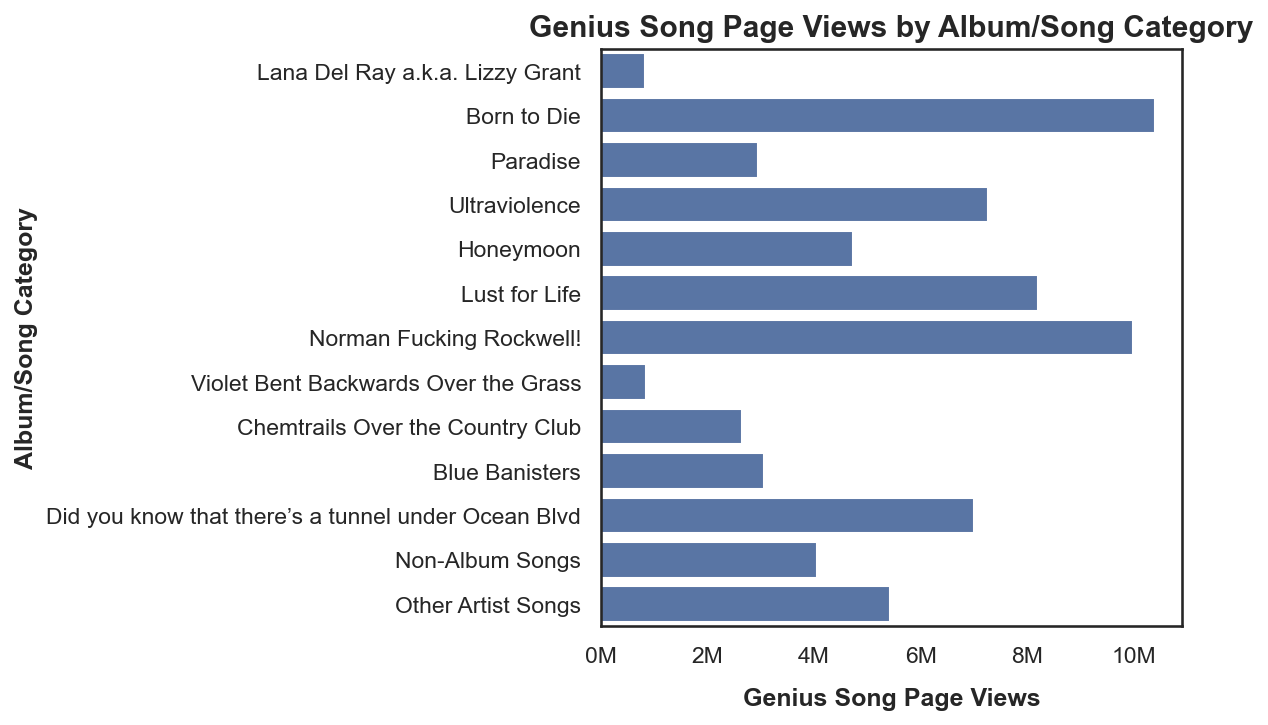

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker

sns.set_theme(style='white')
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(df_v_sum, x='song_page_views', y='category')
plt.title('Genius Song Page Views by Album/Song Category', fontweight='bold', fontsize='large')
plt.xlabel('Genius Song Page Views', fontweight='bold', fontsize='medium', labelpad=10)
plt.ylabel('Album/Song Category', fontweight='bold', fontsize='medium')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000000) + 'M'))
plt.show()

In [20]:
df_v.sort_values('song_page_views', ascending=False).head()

,category,song_title,song_page_views
158,Non-Album Songs,Young and Beautiful,2000000
183,Other Artist Songs,Party Monster,1900000
18,Born to Die,Summertime Sadness,1600000
50,Ultraviolence,West Coast,1400000
190,Other Artist Songs,Snow On The Beach,1300000


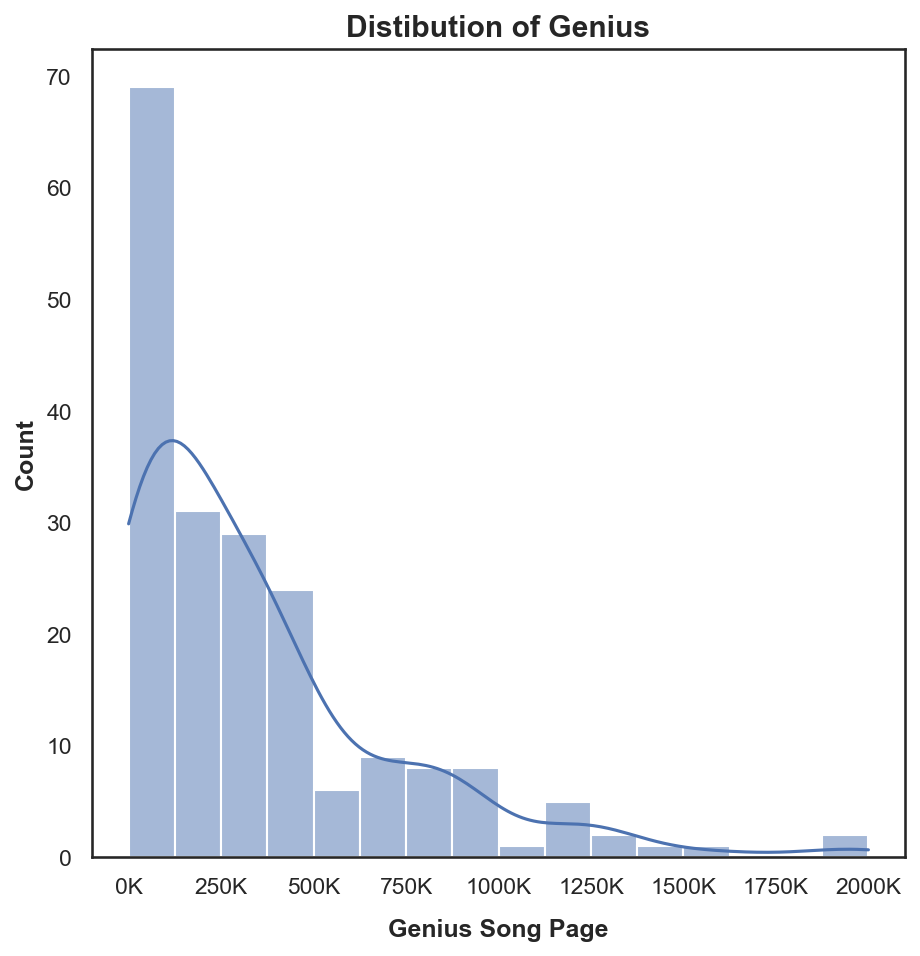

In [26]:
fig, ax =plt.subplots(figsize=(7,7))
sns.histplot(df_v, x='song_page_views', kde=True)
plt.title('Distibution of Genius', fontweight='bold', fontsize='larger')
plt.xlabel('Genius Song Page', fontweight='bold', fontsize='medium', labelpad=10)
plt.ylabel('Count',fontweight='bold', fontsize='medium')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000) + 'K'))
plt.show()

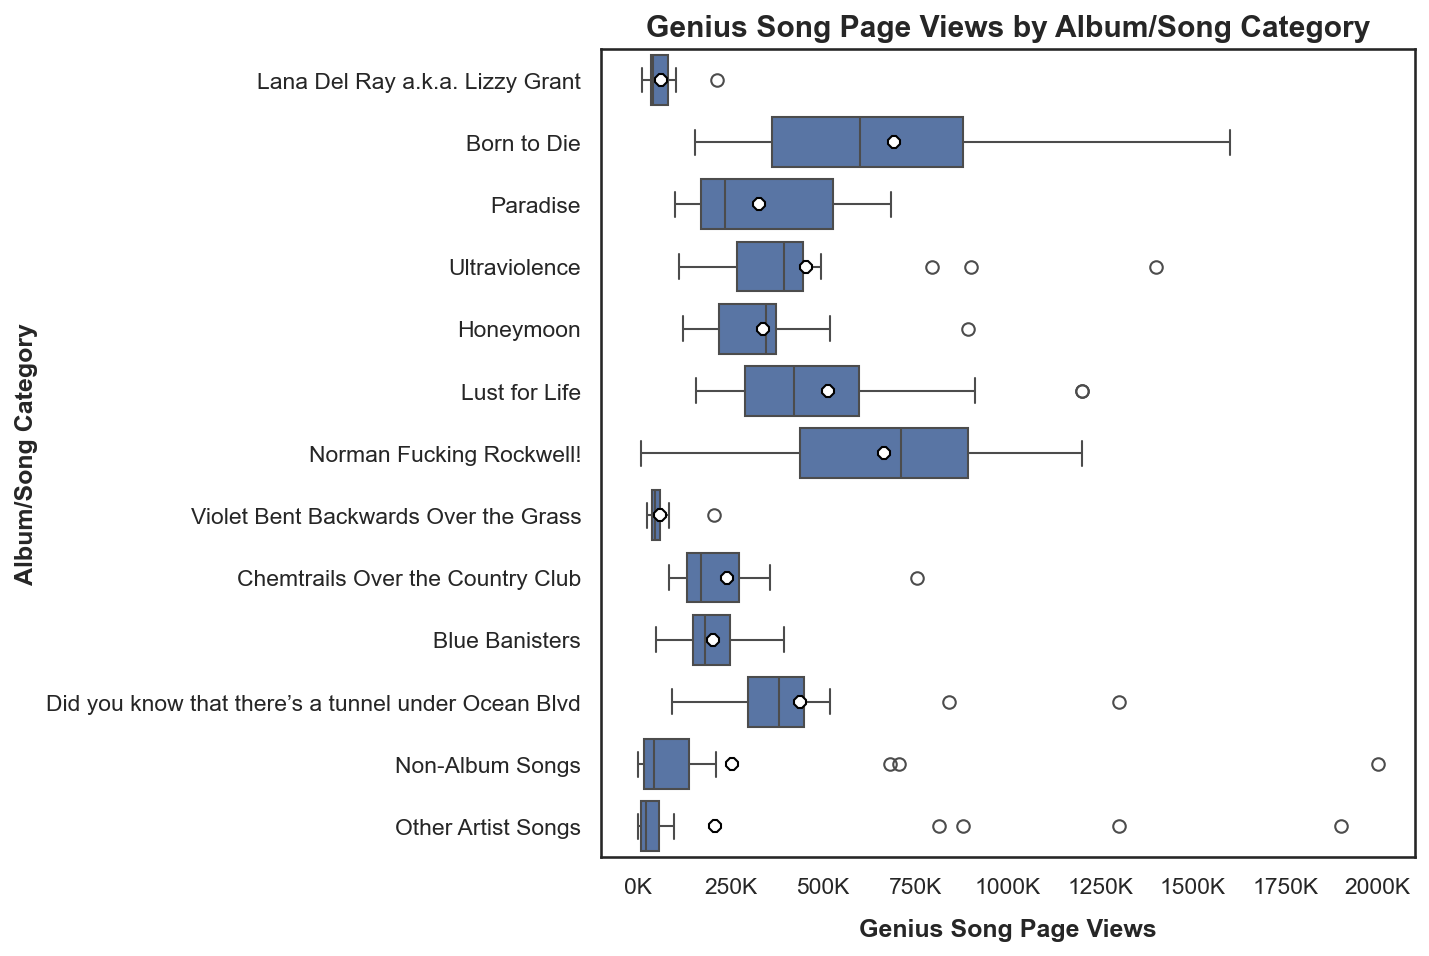

In [27]:
fig, ax = plt.subplots(figsize=(7,7))
sns.boxplot(df_v, x='song_page_views', y='category', showmeans=True, 
            meanprops={'marker':'8','markerfacecolor': fig.get_facecolor(), 'markeredgecolor': '#000000'})
plt.title('Genius Song Page Views by Album/Song Category', fontweight='bold', fontsize='large')
plt.xlabel('Genius Song Page Views', fontweight='bold', fontsize='medium', labelpad=10)
plt.ylabel('Album/Song Category', fontweight='bold', fontsize='medium')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000) + 'K'))
plt.show()